In [1]:
import numpy as np
import os
import json
import math
import csv
import collections
from collections import defaultdict
import pandas as pd
import scipy as scipy
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [ ]:
#df = pd.read_csv('HKLURDataset.xlsx')
df = pd.read_csv('data.csv')

#print(df['Long'])
#pollutant = df['PM2.5'].values
#pollutant = df['NO2.ugm3'].values
#pollutant = df['NO.ugm3'].values
pollutant = df['BlkCarbon'].values

#feature = df['MiniBusD.2000'].values
#feature = df['Rest.1000'].values
feature = df['Eat.500'].values

x = []
y = []
for i in range(len(pollutant)):
    if not math.isnan(pollutant[i]): 
        #print(i)
        x.append(feature[i])
        y.append(pollutant[i])
        df.drop(df.index[i])


In [ ]:
r_row, p_value = pearsonr(x, y)
print(r_row**2)

In [ ]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

print(r_value**2)

<h3> Linear Regression </h3>

In [ ]:
df = df[np.isfinite(df['BlkCarbon'])]

X = df[['ExpRL.3000', 'ExpRL.50', 'Long', 'CarPD.50', 'ComT.500', 'ResT.50', 'MixT.500', 'Eat.500']]
# Note that 'Lands.500' is not in dataset
#print(X.head)
y = df[['BlkCarbon']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_prediction = linearRegressor.predict(X_test)

In [ ]:

#metrics.accuracy_score(y_test.values, y_prediction) # only works for classification

#print(y_test.values)
#print(y_prediction)

#linearRegressor.score(y_test.values, y_prediction)
print(metrics.mean_squared_error(y_test.values, y_prediction))
print(metrics.mean_absolute_error(y_test.values, y_prediction))
print(np.sqrt(metrics.mean_squared_error(y_test.values, y_prediction)))
#metrics.explained_variance_score(y_test.values, y_prediction) # this might give r squared value
#r_row, p_value = pearsonr(y_test.values, y_prediction)
#print(r_row**2)

### Random Forest

Basic Model Performance
MAE: 4.5903
(MAPE) Accuracy = 55.72%
MSE: 37.1837
RMSE: 6.0978


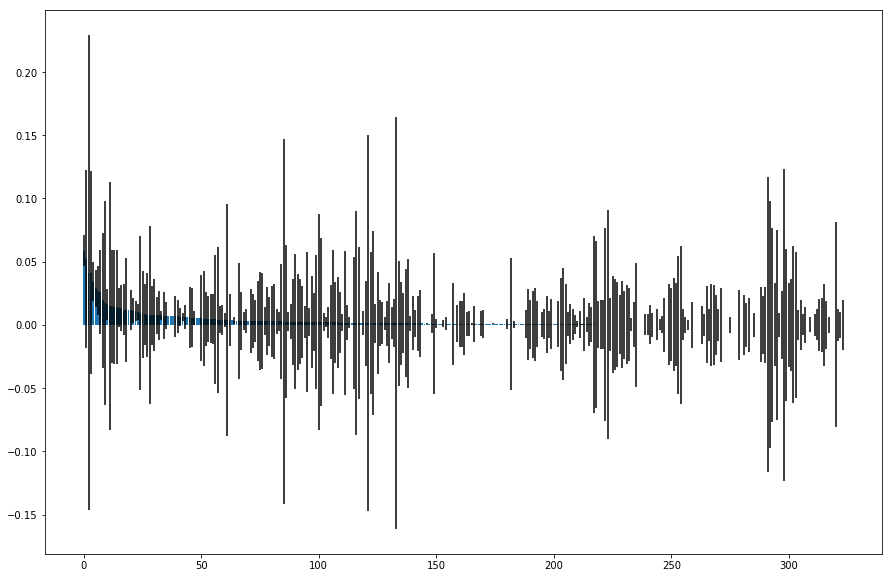

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
#df1=pd.read_csv('HKLURDataset.csv')
#df1 = df1[np.isfinite(df1['PM2.5'])]
#pollutant_pred = df1['PM2.5'].values
#df2=pd.read_csv('HKLURDataset.csv')
#df2 = df2[np.isfinite(df2['PM2.5'])]
#del df2['BlkCarbon']
#del df2['SiteID']
#del df2['FlightRouteBuf']
#del df2['NO2.ugm3']
#del df2['NO.ugm3']
#del df2['PM2.5.SC1']
#del df2['PM2.5.SC2']
#del df2['PM2.5']

#X = df2
#y = df1[['PM2.5']]
#y = np.ravel(y)

df_Xtrain=pd.read_csv('BlkCarbon-Train.csv')
del df_Xtrain['Index']
del df_Xtrain['BlkCarbon']
del df_Xtrain['SiteID']
del df_Xtrain['FlightRouteBuf']
del df_Xtrain['NO2.ugm3']
del df_Xtrain['NO.ugm3']
del df_Xtrain['PM2.5.SC1']
del df_Xtrain['PM2.5.SC2']
del df_Xtrain['PM2.5']

df_ytrain=pd.read_csv('BlkCarbon-Train.csv')

df_Xtest=pd.read_csv('BlkCarbon-Test.csv')
del df_Xtest['Index']
del df_Xtest['BlkCarbon']
del df_Xtest['SiteID']
del df_Xtest['FlightRouteBuf']
del df_Xtest['NO2.ugm3']
del df_Xtest['NO.ugm3']
del df_Xtest['PM2.5.SC1']
del df_Xtest['PM2.5.SC2']
del df_Xtest['PM2.5']

df_ytest=pd.read_csv('BlkCarbon-Test.csv')

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train = df_Xtrain
y_train = df_ytrain[['BlkCarbon']]
y_train = np.ravel(y_train)
X_test = df_Xtest
y_test = df_ytest[['BlkCarbon']]
y_test = np.ravel(y_test)

basic = RandomForestRegressor(max_depth=2, n_estimators = 1000, random_state = 42)
basic.fit(X_train, y_train)
predictions_basic = basic.predict(X_test)

errors_basic = abs(predictions_basic - y_test)
mape_basic = 100 * np.mean(errors_basic / y_test)
accuracy_basic = 100 - mape_basic
squared_errors_basic = (errors_basic**2)
print('Basic Model Performance')
print('MAE: {:0.4f}'.format(np.mean(errors_basic)))
print('(MAPE) Accuracy = {:0.2f}%'.format(accuracy_basic))
print('MSE: {:0.4f}'.format(np.mean(squared_errors_basic)))
print('RMSE: {:0.4f}'.format(np.sqrt(np.mean(squared_errors_basic))))

importance = basic.feature_importances_
feature_importances = pd.DataFrame(importance, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.to_csv("Feature-Importance-BlkCarbon.csv", sep=',')
feature_importances["Std"] = np.std([tree.feature_importances_
                            for tree in basic.estimators_], axis=0)
x1 = range(feature_importances.shape[0])
y1 = feature_importances.iloc[:, 0]
yerr1 = feature_importances.iloc[:, 1]
plt.figure(figsize=(15,10))
plt.bar(x1, y1, yerr=yerr1, align="center")
plt.show()

### Random Forest hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

grid_search_params = {'bootstrap': [True],
     'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10],
     'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]}

#print(grid_search_params)

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf, param_grid=grid_search_params, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

#print(grid_search.best_params_)

best_grid = grid_search.best_estimator_
#print(best_grid)

In [ ]:
print(grid_search.best_params_)

print(best_grid)

predictions_rf = grid_search.predict(X_test)

errors_rf = abs(predictions_rf - y_test)
mape_rf = 100 * np.mean(errors_rf / y_test)
accuracy_rf = 100 - mape_rf
squared_errors_rf = (errors_rf**2)

print('RF Model with hyperparameter tuning Performance')
print('MAE: {:0.4f}'.format(np.mean(errors_rf)))
print('(MAPE) Accuracy = {:0.2f}%.'.format(accuracy_rf))
print('MSE: {:0.4f}'.format(np.mean(squared_errors_rf)))

importance = grid_search.best_estimator_.feature_importances_
feature_importances_grid = pd.DataFrame(importance, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_grid)
feature_importances_grid["Std"] = np.std([tree.feature_importances_
                            for tree in basic.estimators_], axis=0)
x1 = range(feature_importances_grid.shape[0])
y1 = feature_importances_grid.iloc[:, 0]
yerr1 = feature_importances_grid.iloc[:, 1]
plt.figure(figsize=(15,10))
plt.bar(x1, y1, yerr=yerr1, align="center")
plt.show()